In [2]:
import numpy as np
import pandas as pd
np.random.seed(42)

apartments = [f"Apt-{i}" for i in range(1, 21)]
dates = pd.date_range(start="2025-07-01", periods=30, freq="D")

data = {
    "Date": np.tile(dates, len(apartments)),
    "Apartment": np.repeat(apartments, len(dates)),
    "Electricity_usage": np.random.normal(loc=20, scale=5, size=len(dates)*len(apartments))
}

df = pd.DataFrame(data)
df

,Date,Apartment,Electricity_usage
0,2025-07-01,Apt-1,22.483571
1,2025-07-02,Apt-1,19.308678
2,2025-07-03,Apt-1,23.238443
3,2025-07-04,Apt-1,27.615149
4,2025-07-05,Apt-1,18.829233
...,...,...,...
595,2025-07-26,Apt-20,17.449918
596,2025-07-27,Apt-20,18.650625
597,2025-07-28,Apt-20,15.106181
598,2025-07-29,Apt-20,17.778534


In [3]:
print(df.dtypes)

Date                 datetime64[ns]
Apartment                    object
Electricity_usage           float64
dtype: object


In [6]:
#Total usage per apartements
usage_per_apartment= df.groupby("Apartment")["Electricity_usage"].sum().sort_values(ascending=False)

In [7]:
print(usage_per_apartment)

Apartment
Apt-11    642.282391
Apt-6     641.817993
Apt-13    634.225898
Apt-10    616.074819
Apt-20    613.164300
Apt-7     609.838848
Apt-8     607.205434
Apt-16    606.985293
Apt-14    604.314773
Apt-3     601.932716
Apt-4     596.962256
Apt-15    591.394231
Apt-19    586.585246
Apt-5     585.756283
Apt-2     581.825629
Apt-9     578.485218
Apt-1     571.777966
Apt-17    570.315585
Apt-12    569.016727
Apt-18    549.480581
Name: Electricity_usage, dtype: float64


In [9]:
daily_avg = df.groupby("Date")["Electricity_usage"].mean()
print(daily_avg.head())

Date
2025-07-01    21.043539
2025-07-02    20.870132
2025-07-03    19.567646
2025-07-04    20.985517
2025-07-05    19.782940
Name: Electricity_usage, dtype: float64


In [10]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

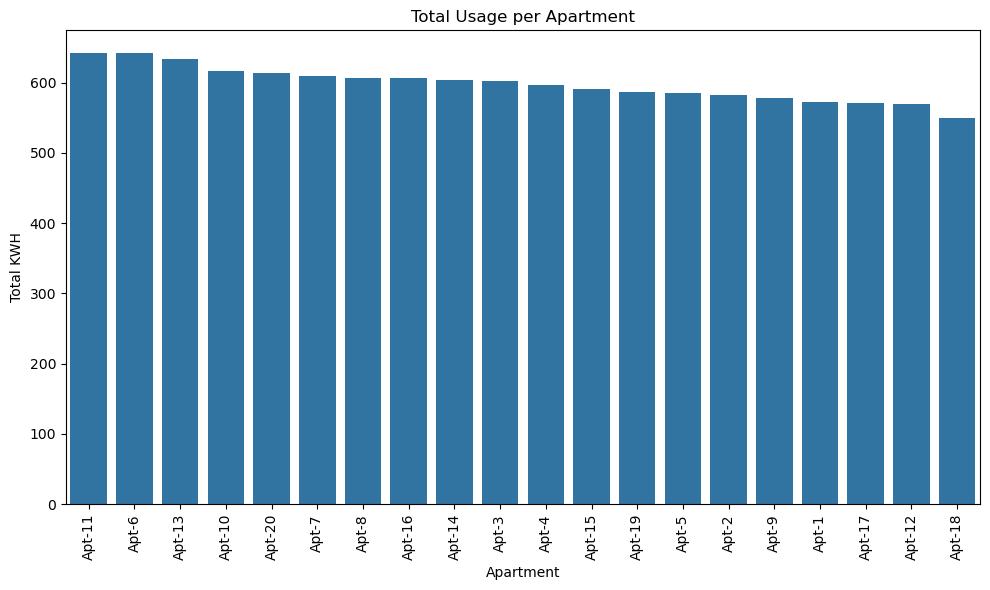

In [18]:
plt.figure(figsize=(10,6))
sns.barplot(x=usage_per_apartment.index, y=usage_per_apartment.values)
plt.xticks(rotation=90)  # Fixed typo in "rotation"
plt.title("Total Usage per Apartment")
plt.xlabel("Apartment")  # Fixed: plt.y.xlabel → plt.xlabel
plt.ylabel("Total KWH")
plt.tight_layout()
plt.show()

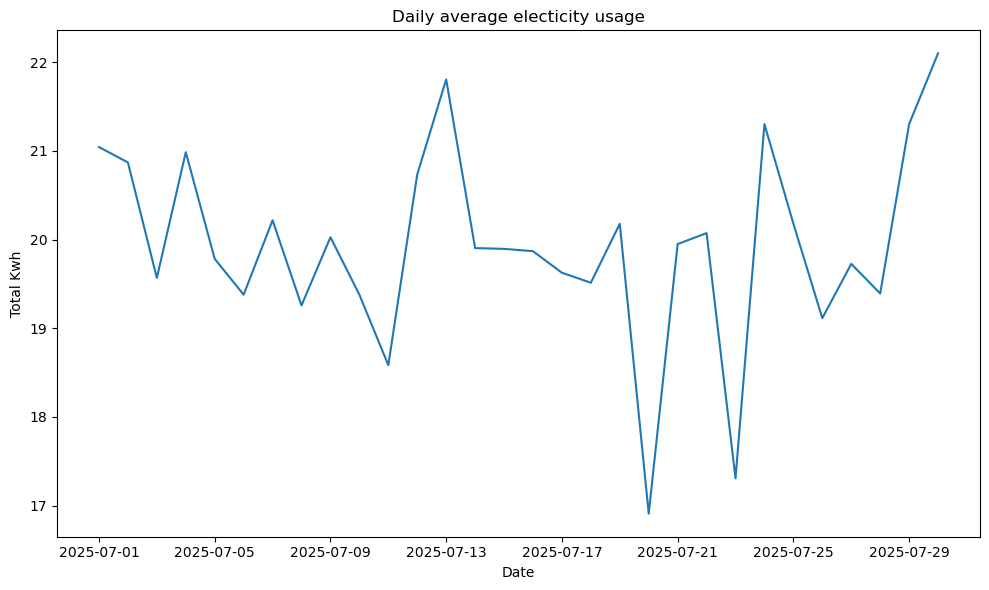

In [20]:
plt.figure(figsize=(10,6))
sns.lineplot(x=daily_avg.index,y=daily_avg.values)
plt.title("Daily average electicity usage")
plt.xlabel("Date")
plt.ylabel("Total Kwh")
plt.tight_layout()
plt.show ()

In [26]:
threshold= df["Electricity_usage"].mean()+2 *df ["Electricity_usage"].std()
df["High_Usage_flag"]=df["Electricity_usage"] > threshold
print(df[df["High_Usage_flag"]==True].head())

          Date Apartment  Electricity_usage  High_Usage_flag
113 2025-07-24     Apt-4          32.316211             True
125 2025-07-06     Apt-5          30.952278             True
179 2025-07-30     Apt-6          33.600846             True
209 2025-07-30     Apt-7          39.263657             True
220 2025-07-11     Apt-8          31.573293             True
